# Class 16: Naive Bayes Classification

To learn a classifier, we need labeled data (features and target)

We split our data twice:
- sample-wise: test and train
- variable-wise: features and target

## Naive Bayes with Sci-kit Learn

We will use a new package today, [Scikit-Learn](https://scikit-learn.org/stable/index.html). Its package name for importing is `sklearn` but we don't import it with an alias, in general.  It's a large module and we most often import just the parts we need.  

````{margin}
```{tip}
Recall when a word turns green & bold in a notebook, it's a python keyword, or reserved word.
```
````

To do that we use a new Python keyword `from`.  We can identify a package and then import a submodule or a package and submodule with `.` and then import specific functions or classes.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

We can tell from this code that `test_train_split` is probably a function because it's in lowercase and `sklearn` follows [PEP 8](https://www.python.org/dev/peps/pep-0008/) the Python Style Guide pretty strictly.  We can also check with type

In [2]:
type(train_test_split)

function

We can tell [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) is probably a class because it's in [CapWords](https://www.python.org/dev/peps/pep-0008/#class-names), also known as [camel case](https://en.wikipedia.org/wiki/Camel_case).

Again we can check.

In [3]:
type(GaussianNB)

abc.ABCMeta

That's an abstract base class.

Today we'll work with the [iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset, which has been used for demonstrating statistical analyses since 1936.  It contains 4 measurements of flowers from 3 different species.

In [4]:
iris_df = sns.load_dataset('iris')

As usual, we look at the structure.

In [5]:
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Next we examine the data litle further to consider what the structure is like for classification purposes.

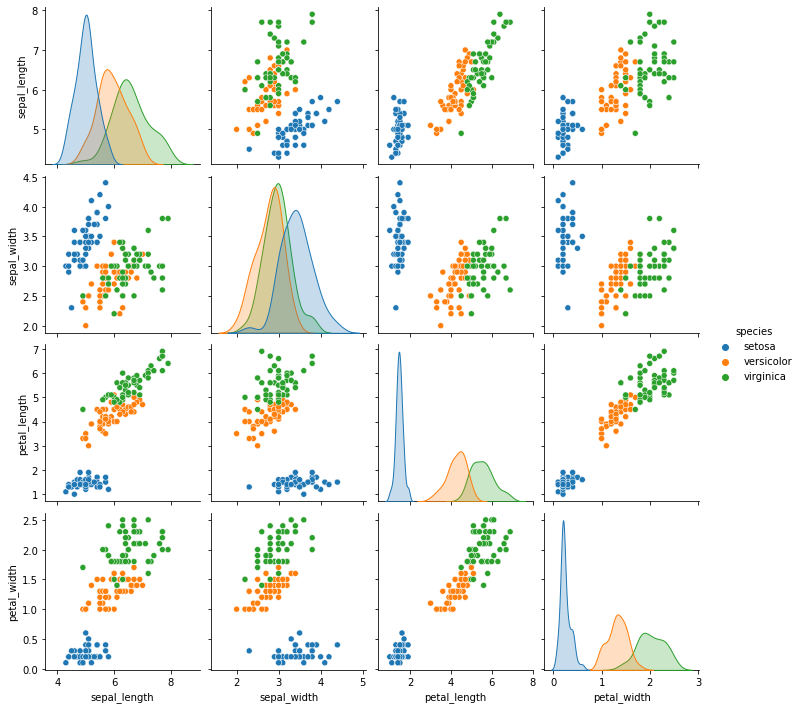

In [6]:
sns.pairplot(data= iris_df, hue='species')

In order for classification to work, we're looking to see that the groups of samples of different classes (here, species) do not overlap too much.  We're also looking at the shape of the groups of samples of each class.  

## Naive Bayes

Naive Bayes assumes that the features are uncorrelated (Naive) and that we can pick the most probable class.  It can assume different distributions of the features conditioned on the class, though.  We'll use Gaussian Naive Bayes.  Gaussian distributed samples in the plot above would be roughly ovals with more points at the center and uncorrelated Gaussian data would be distributed in circles, not ovals.  We have some ovals and some overlap, but enough we can expect this classifier to work pretty well.


First we instantiate the classifier object with the constructor method.

In [7]:
gnb = GaussianNB()

We just made it exist so far, nothing more, so we can check its type.

In [8]:
type(gnb)

sklearn.naive_bayes.GaussianNB

We can also use the `get_params` method to see what it looks like.

In [9]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

## Training a Model


Before we trian the model, we have to get our data out of the DataFrame, because our `gnb.fit` method takes arrays. We can use the `values` attribute

In [10]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

Then we create test an train splits of our data.  we'll to equal parts (`test_size = .5`) and set the random state so that we call get the same result

In [11]:
X_train, X_test,  y_train, y_test = train_test_split(iris_df.values[:,:4],
                                                     iris_df.values[:,-1],
                                                    test_size = .5,
                                                    random_state =0)

```{admonition} try it yourself!
1. rerun the test `train_test_split` without random state, to see how it's different
1. change the `test_size` to different sizes and see what happens.
```

Now we use the _training_ data to fit our model.

In [12]:
gnb.fit(X_train, y_train)

GaussianNB()

Now we can predict using the _test_ data's features only.

In [13]:
y_pred = gnb.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica

We can compare this to the y_test to see how well our classifier works.

In [14]:
y_test

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', '

We can simply use base python to get the number correct with a boolean and sum since `False` turns to 0 and `True` to 1.

In [15]:
sum(y_pred == y_test)

71

and compare that with the total

In [16]:
len(y_pred)

75

or compute accuracy

In [17]:
sum(y_pred == y_test)/len(y_pred)

0.9466666666666667

## Questions after class



### I'm curious about other classifiers

Great! We'll see more Friday, next week, and next month.  You're also encouraged to try out others and experiment with sci-kit learn.

###  How could this be related to NLP?

Naive Bayes isn't a good classifier for NLP most of the time because word are not independent, but for very coarse distinctions it can be applied. The _Gaussian_ naive Bayes we used today doesn't apply to NLP without a lot of transformation because in general, words are more like categorical (or binary/dummies) variables than continuous valued.

We'll work with text data toward the end of the semester.

## How we got the values from the DataFrame

A DataFrame is an object and one of the attributes is [`values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html#pandas.DataFrame.values), we accessed that directly. However, there is a new, safer way through the [`to_numpy` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy).

<!-- Why is this algorithm fast? -->